In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.multitest import multipletests
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<IPython.core.display.Javascript object>

In [3]:
PATH = "data/wages1.csv"

wages1 = pd.read_csv(PATH)

<IPython.core.display.Javascript object>

In [4]:
wages1.head()

,exper,sex,school,wage
0,9,female,13,6.315296
1,12,female,12,5.479770
2,11,female,11,3.642170
3,9,female,14,4.593337
4,8,female,14,2.418157


<IPython.core.display.Javascript object>

In [5]:
wages1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3294 entries, 0 to 3293
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   exper   3294 non-null   int64  
 1   sex     3294 non-null   object 
 2   school  3294 non-null   int64  
 3   wage    3294 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 103.1+ KB


<IPython.core.display.Javascript object>

In [16]:
wages1.exper.value_counts()

9     654
8     632
7     471
6     359
10    328
11    229
5     212
4     133
12    110
3      66
13     35
14     23
2      16
15     10
16      9
18      3
1       2
17      2
Name: exper, dtype: int64

<IPython.core.display.Javascript object>

In [22]:
wages1.groupby("sex").describe()

exper                                                 school  \
         count      mean       std  min  25%  50%   75%   max   count   
sex                                                                     
female  1569.0  7.732314  2.171471  1.0  6.0  8.0   9.0  16.0  1569.0   
male    1725.0  8.326377  2.359172  2.0  7.0  8.0  10.0  18.0  1725.0   

                   ...                wage                                \
             mean  ...   75%   max   count      mean       std       min   
sex                ...                                                     
female  11.837476  ...  13.0  16.0  1569.0  5.146924  2.876237  0.076556   
male    11.442319  ...  12.0  16.0  1725.0  6.313021  3.498861  0.153480   

                                                 
             25%       50%       75%        max  
sex                                              
female  3.175640  4.693262  6.532745  32.497400  
male    4.028983  5.654321  7.891325  39.808917  

[2 rows x 24 columns]

<IPython.core.display.Javascript object>

In [24]:
wages1.groupby("sex").corr()

exper    school      wage
sex                                        
female exper   1.000000 -0.056524  0.090110
       school -0.056524  1.000000  0.294314
       wage    0.090110  0.294314  1.000000
male   exper   1.000000 -0.273282 -0.012973
       school -0.273282  1.000000  0.322171
       wage   -0.012973  0.322171  1.000000

<IPython.core.display.Javascript object>

In [31]:
wages1.corr()

,exper,school,wage
exper,1.000000,-0.193565,0.051381
school,-0.193565,1.000000,0.282492
wage,0.051381,0.282492,1.000000


<IPython.core.display.Javascript object>

* Variables: This data set contains a categorical variable of sex, as well as ordinal variables for level of education and experience in years. Wage in 1980's dollars are represented as a continuous variable.

* We can investigate if there is a significant idfference in wages between men and women. We can also segment the data based on category of education level; the number of years can be used to categorize whether a person has a HS diploma, bachelor's degree, or higher level of college. The same can be done for experience, but there are less obvious groups to segment by, and it appears to have a much smaller correlation with wage than schooling. 

* We can also segment by education within our gender groups. 

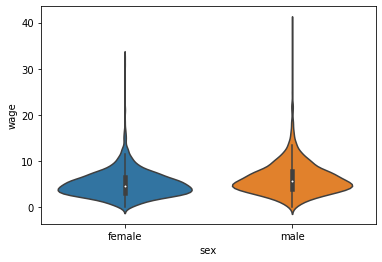

<IPython.core.display.Javascript object>

In [26]:
sns.violinplot("sex", "wage", data=wages1)

In [27]:
wages_m = wages1[wages1["sex"] == "male"]
wages_f = wages1[wages1["sex"] == "female"]
print(stats.describe(wages_m["wage"]))
print(stats.describe(wages_f["wage"]))

DescribeResult(nobs=1725, minmax=(0.153480163, 39.8089172), mean=6.313021159544348, variance=12.242030517969713, skewness=1.9197304245938702, kurtosis=8.81644769325741)
DescribeResult(nobs=1569, minmax=(0.07655561, 32.49740023), mean=5.146923868010835, variance=8.272740074298863, skewness=1.975136812685578, kurtosis=10.950513147641566)


<IPython.core.display.Javascript object>

In [29]:
# Neither distribution is normal. Would want to do a Mann-Whitney or Mood's Median
stats.median_test(wages_m["wage"], wages_f["wage"])

(61.540172730892095,
 4.338013870860888e-15,
 5.20578148,
 array([[966, 663],
        [759, 906]], dtype=int64))

<IPython.core.display.Javascript object>

In [30]:
stats.median_test?

<IPython.core.display.Javascript object>